In [98]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Kaggle/
%ls

Mounted at /content/drive
/content/drive/MyDrive/Kaggle
BankChurners.csv  creditcard.csv  kaggle.json       test_twitter.csv
catboost_info/    heart.csv       o2Saturation.csv  train_twitter.csv


# Начало работы

In [3]:
df=pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Условие задачи

<h3>
<p>Attrition_Flag характеризует ушел клиент или нет.</p>
<p>Здача: Предсказать по входным данным уйдет ли клиент, чтобы в будущем таких клиентоа до их ухода можно было сохранить.</p>
</h3>

# <h3>Предобработка данных</h3>

## Удаление ненужных колонок

In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
df=df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])

Удалил <p>'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'</p> и <p>'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']<p> потому что они прдеставляют закодиованный колонки 

In [6]:
df=df.drop(columns=['CLIENTNUM'])

CLIENTNUM характеризует номер клиента, поэтому в предсказании ни чем не поможет

## Исследование данных на сбалансированность

In [30]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [31]:
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

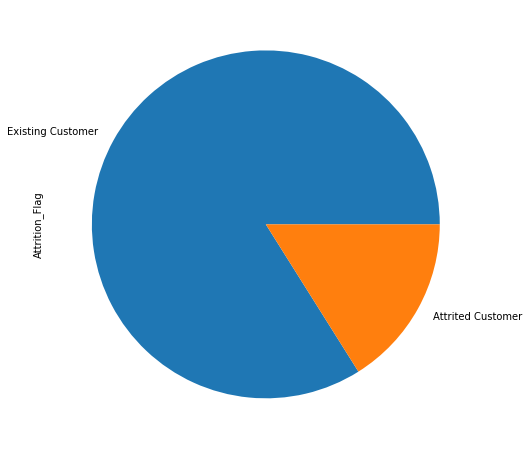

In [32]:
df['Attrition_Flag'].value_counts().plot.pie(figsize=(8,8))

Цели несбалансированные

## Исследование на пропуски

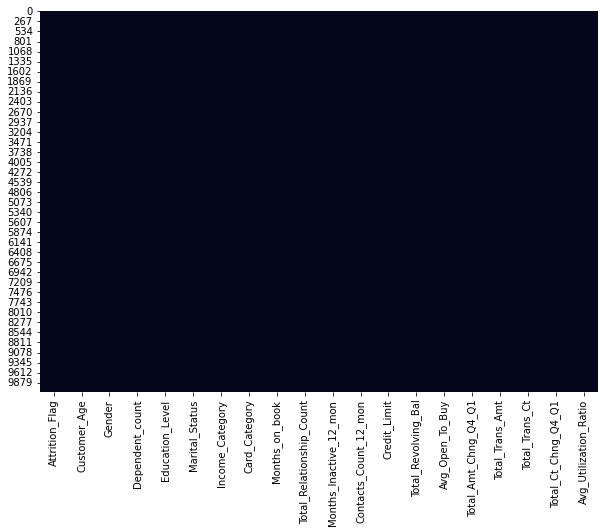

In [33]:
figure(figsize=(10,7))
sns.heatmap(df.isnull(),cbar=False)

Пропусков нет

## Исследование на аномалии

In [34]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc4831ab50>,
      dtype=object)

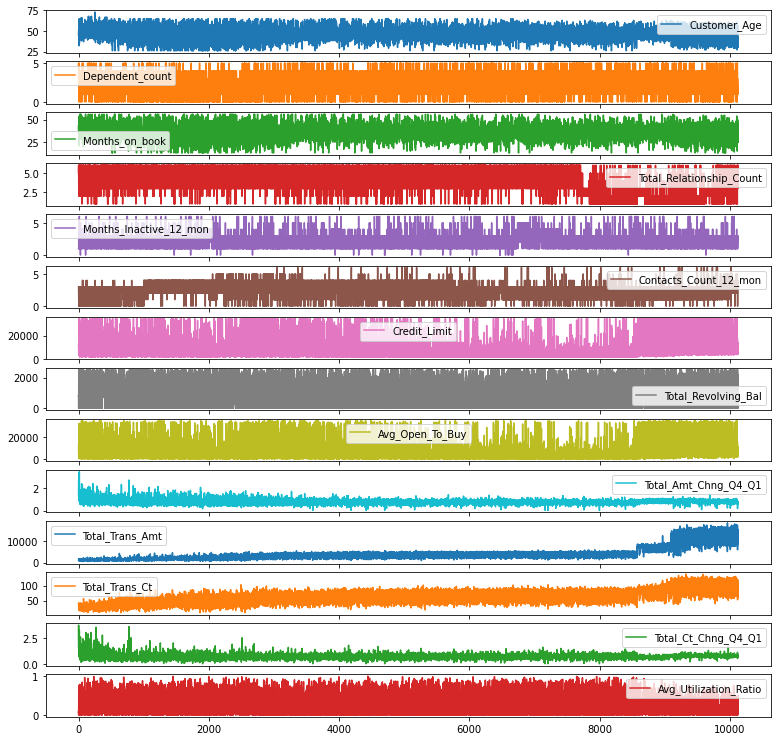

In [35]:
df.plot(subplots=True, figsize = (13, 13))

Аномалий нету

## Рассмотрение распределений данных и кореляции признаков

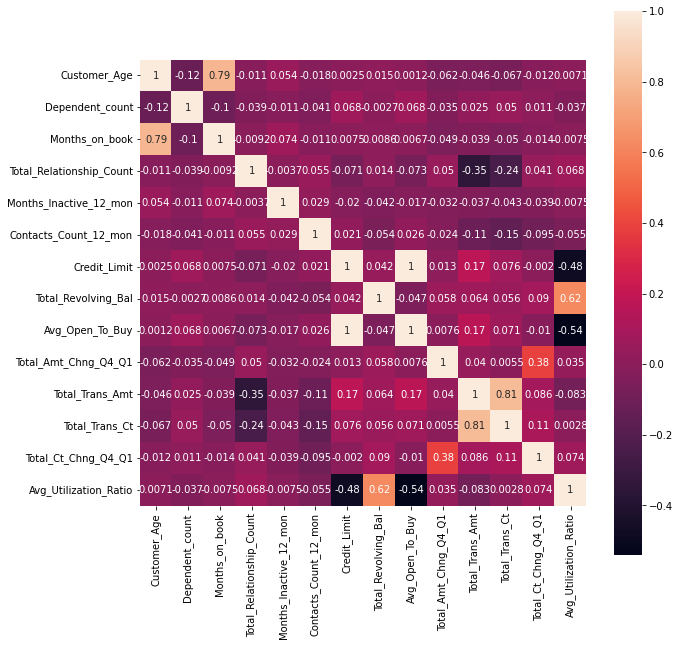

In [36]:
figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, square=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc46303bd0>,
      dtype=object)

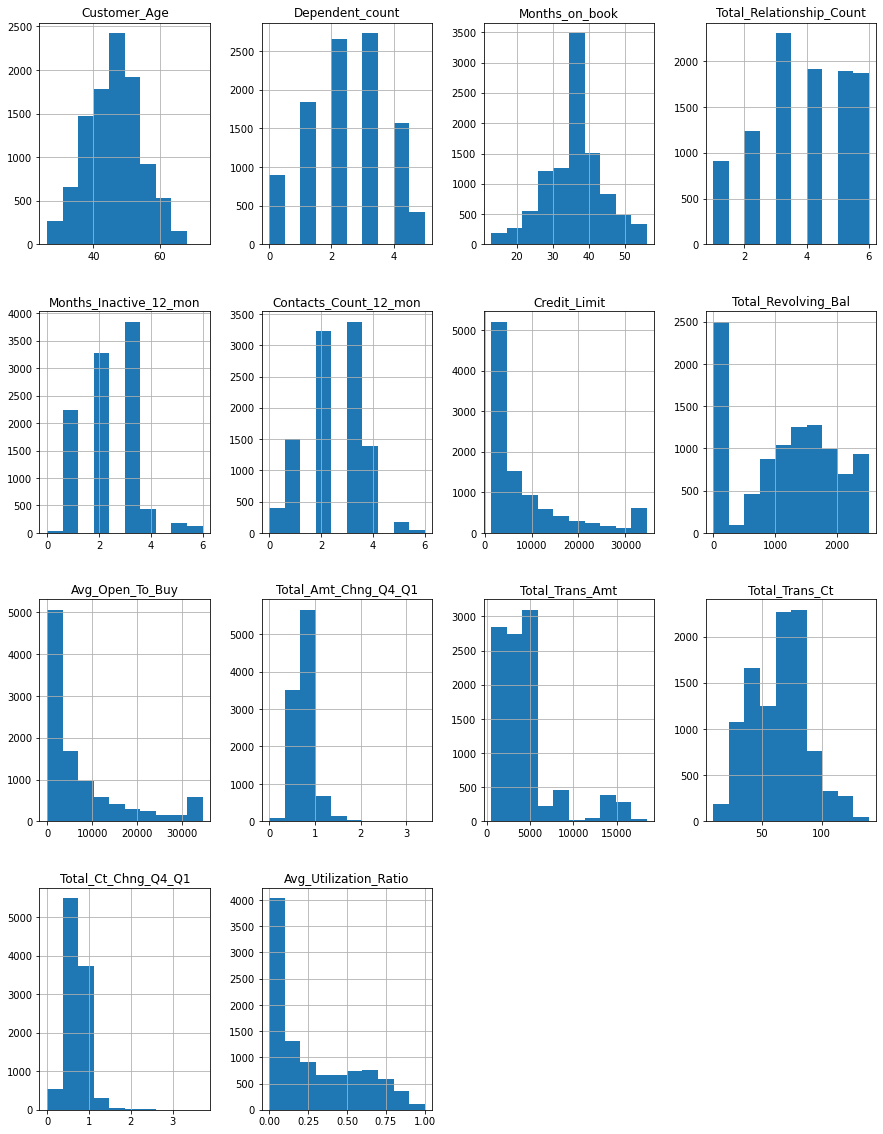

In [37]:
df.hist(figsize=(15, 20))

In [228]:
df.groupby('Attrition_Flag')["Customer_Age"].describe(percentiles=[])

,count,mean,std,min,50%,max
Attrition_Flag,,,,,,
Attrited Customer,1627.0,46.659496,7.665652,26.0,47.0,68.0
Existing Customer,8500.0,46.262118,8.081157,26.0,46.0,73.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Менять int64 и float64 не имеет смысла так как таблица и так очень маленькая и весит мало.

## Удаление дубликатов

In [7]:
df.shape

(10127, 20)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(10127, 20)

Дубликатов не было

## Кодирование категориальных признаков

In [7]:
def encode_df(df):
    init_df = df.copy()
    encoders={}
    for column in init_df.columns:
        if init_df[column].dtype==np.object:
            encoders[column]=LabelEncoder()
            init_df[column] = encoders[column].fit_transform(init_df[column])
    return init_df,encoders

In [8]:
df_label_enc,encoders=encode_df(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [9]:
df_label_enc.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
df_label_enc['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [11]:
df_label_enc['Attrition_Flag']=df_label_enc['Attrition_Flag'].map({0:1,1:0})

In [12]:
df_label_enc['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

1 - счет закрыт<br>
0 - счет открыт

## Разделение данных на Train Test

In [13]:
X=df_label_enc.drop(columns=['Attrition_Flag'])
Y=df_label_enc['Attrition_Flag']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123,stratify=Y)

In [15]:
y_train.value_counts()

0    6799
1    1302
Name: Attrition_Flag, dtype: int64

In [16]:
y_train.value_counts(normalize=True)

0    0.839279
1    0.160721
Name: Attrition_Flag, dtype: float64

In [17]:
y_test.value_counts()

0    1701
1     325
Name: Attrition_Flag, dtype: int64

In [18]:
y_test.value_counts(normalize=True)

0    0.839585
1    0.160415
Name: Attrition_Flag, dtype: float64

Данные разбиты в соотбествии с дисбалансом

In [19]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

# PCA отображение

In [ ]:
ss = StandardScaler()
X_for_pca = ss.fit_transform(X_test)

In [ ]:
pca_2 = PCA(2)
X_for_pca_2=pca_2.fit_transform(X_for_pca)

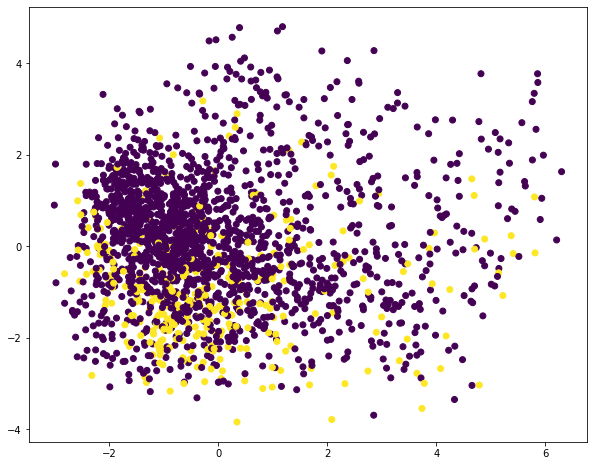

In [ ]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X_for_pca_2.T[0], X_for_pca_2.T[1], c=y_test)

In [ ]:
pca_3 = PCA(3)
X_for_pca_3=pca_3.fit_transform(X_for_pca)

Text(0.5, 0, 'PC3')

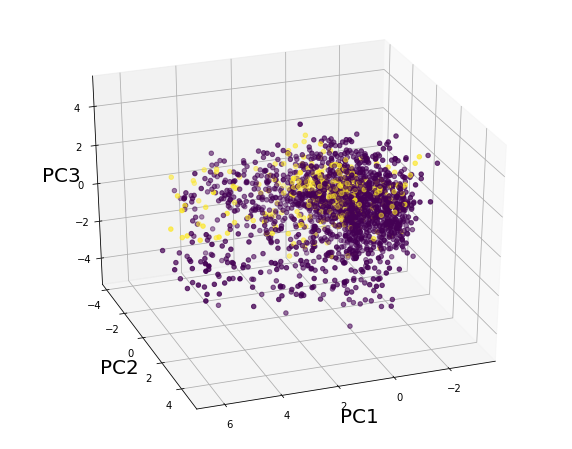

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 70)
ax.scatter(X_for_pca_3.T[0], X_for_pca_3.T[1], X_for_pca_3.T[2], c=y_test)
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)

# t-sne отображение

In [ ]:
tsne_2=TSNE(2)

In [ ]:
X_t_sne_2=tsne_2.fit_transform(X_for_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


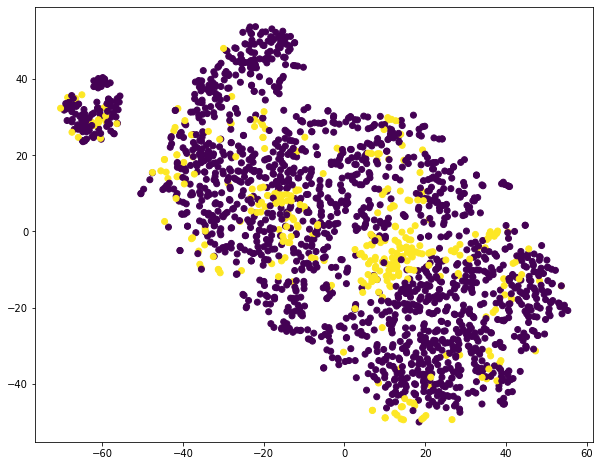

In [ ]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X_t_sne_2.T[0], X_t_sne_2.T[1], c=y_test)

In [ ]:
tsne_3=TSNE(3)

In [ ]:
X_t_sne_3=tsne_3.fit_transform(X_for_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 0, 'PC3')

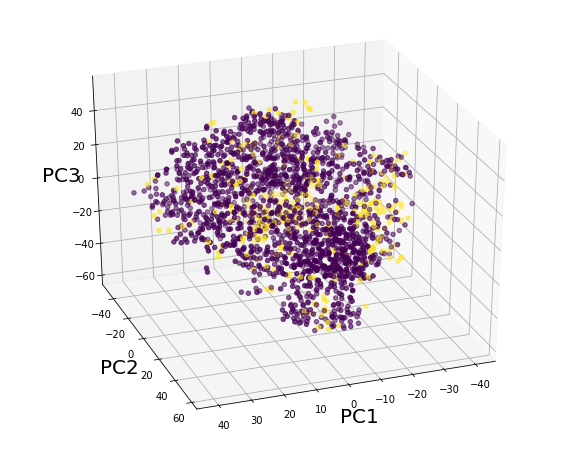

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 70)
ax.scatter(X_t_sne_3.T[0], X_t_sne_3.T[1], X_t_sne_3.T[2], c=y_test)
ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)

# Решение задачи без настройки параметров

## Logistic Regression

In [90]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('lr',LogisticRegression())])
params={}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [91]:
gs=gs.fit(X_train,y_train)

In [92]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1701
           1       0.81      0.58      0.68       325

    accuracy                           0.91      2026
   macro avg       0.86      0.78      0.81      2026
weighted avg       0.91      0.91      0.90      2026



ROC AUC = 0.7788


Text(0.5, 0, 'False Positive Rate')

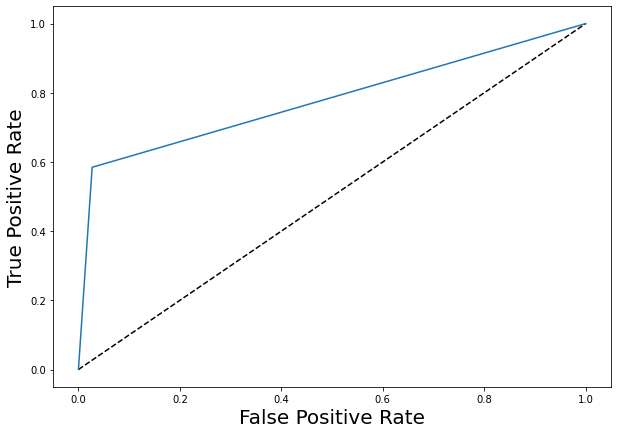

In [100]:
fpr, tpr, _ = roc_curve(y_test, y_hat)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

In [101]:
confusion_matrix(y_test, y_hat)

array([[1655,   46],
       [ 135,  190]])

Несмотря на дисбаланс обычная логистическая регрессия показала неплохие результаты. 

## SVM

In [115]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('svc',SVC(kernel="poly",degree=3))])
params={}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [116]:
gs=gs.fit(X_train,y_train)

In [ ]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1701
           1       0.87      0.60      0.71       325

    accuracy                           0.92      2026
   macro avg       0.90      0.79      0.83      2026
weighted avg       0.92      0.92      0.92      2026



ROC AUC = 0.7902


Text(0.5, 0, 'False Positive Rate')

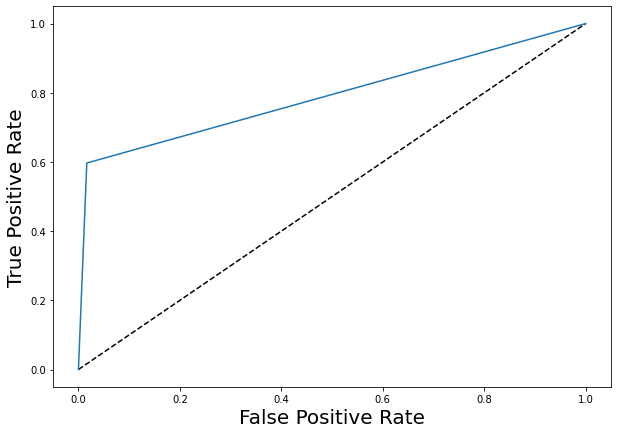

In [117]:
fpr, tpr, _ = roc_curve(y_test, gs.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

In [118]:
confusion_matrix(y_test, gs.predict(X_test))

array([[1673,   28],
       [ 131,  194]])

SVC с полиномиальными ядрами 3-ей степени показал результаты лучше чем logistic regression. Recall выше на 2%, precision выше на 6%, f1-score выше на 3%, macro-avg выше на 2%.

## DecisionTreeClassifier

In [121]:
pipe=Pipeline(steps=[('tree',DecisionTreeClassifier())])
params={}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [122]:
gs=gs.fit(X_train,y_train)

In [136]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1701
           1       0.81      0.78      0.80       325

    accuracy                           0.94      2026
   macro avg       0.89      0.87      0.88      2026
weighted avg       0.94      0.94      0.94      2026



ROC AUC = 0.8775


Text(0.5, 0, 'False Positive Rate')

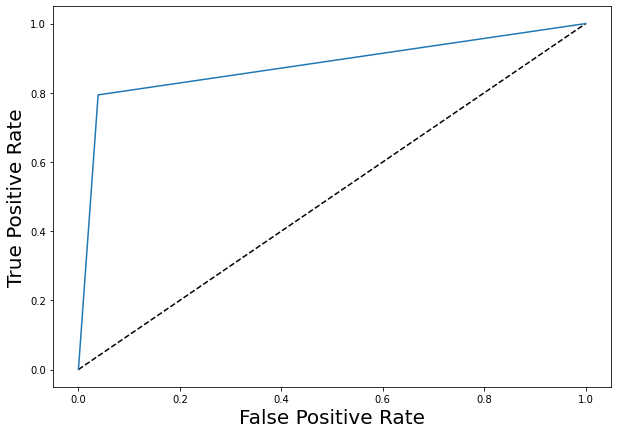

In [123]:
fpr, tpr, _ = roc_curve(y_test, gs.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

In [124]:
confusion_matrix(y_test, gs.predict(X_test))

array([[1635,   66],
       [  67,  258]])

DecisionTree показал результаты лучше чем svc. Recall выше на 18%, precision ниже на 6%, f1-score выше на 9%, macro-avg выше на 5%.

In [36]:
import matplotlib.pyplot as plt
def plot_feature_imp(rf, column_names, top_n):
    
    assert len(rf.feature_importances_) == len(column_names)
    data = pd.DataFrame({'imp':rf.feature_importances_, 'cols':column_names})
    data.sort_values('imp', inplace = True, ascending=False)
    plt.figure(figsize=(15, 10))
    sns.barplot(y='cols', x = 'imp',
        data = data[:top_n], orient='h'
    )
    plt.show()

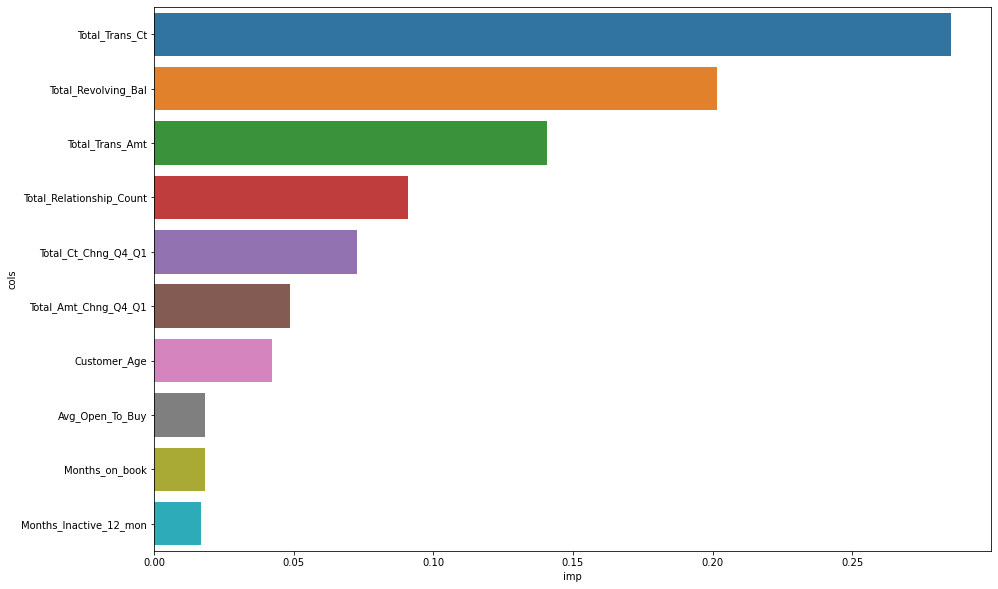

In [148]:
plot_feature_imp(gs.best_estimator_.steps[0][1],df.loc[:,df.columns!="Attrition_Flag"].columns,10)

## RandomForestClassifier

In [125]:
pipe=Pipeline(steps=[('forest',RandomForestClassifier())])
params={}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [126]:
gs=gs.fit(X_train,y_train)

In [151]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1701
           1       0.93      0.80      0.86       325

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



ROC AUC = 0.8935


Text(0.5, 0, 'False Positive Rate')

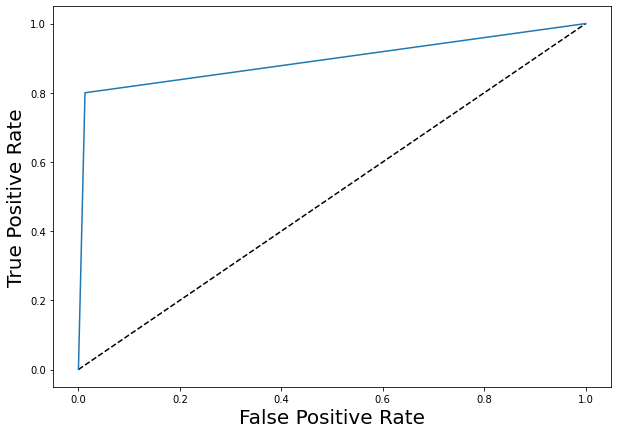

In [127]:
fpr, tpr, _ = roc_curve(y_test, gs.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

In [128]:
confusion_matrix(y_test, gs.predict(X_test))

array([[1679,   22],
       [  65,  260]])

Очевидно лес дал результыты лучше чем дерево, так как усреднение ответов позволиляет уменьшить средний квадрат ошибки в m(кол-во алгоритмов) раз.<br>
Recall выше на 2%, precision выше на 12%, f1-score выше на 6%, macro-avg выше на 4%.


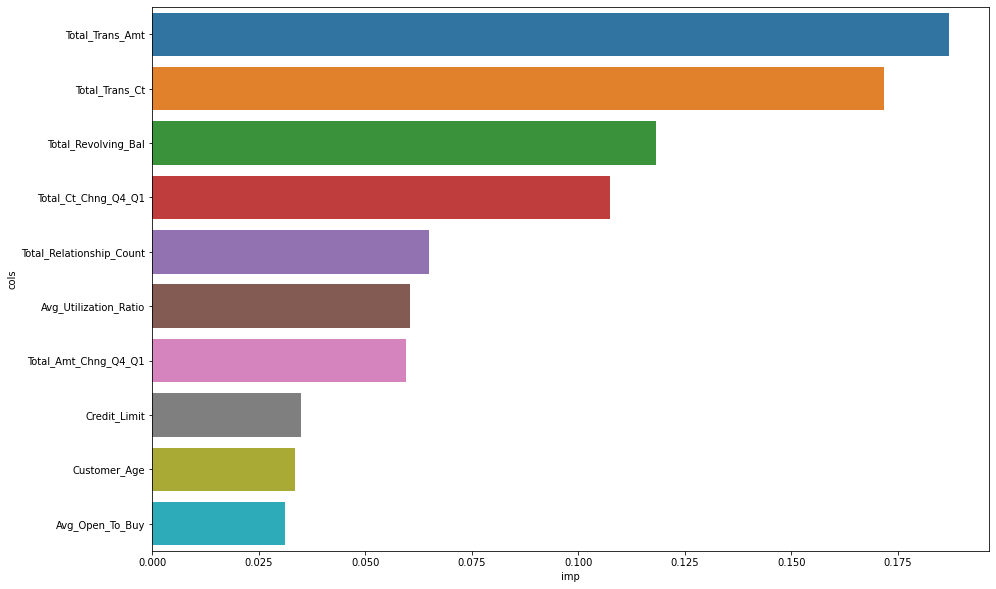

In [152]:
plot_feature_imp(gs.best_estimator_.steps[0][1],df.loc[:,df.columns!="Attrition_Flag"].columns,10)

## AdaBoostClassifier

In [129]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('adaboost',AdaBoostClassifier())])
params={}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [130]:
gs=gs.fit(X_train,y_train)

In [ ]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.92      0.84      0.88       325

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



ROC AUC = 0.9142


Text(0.5, 0, 'False Positive Rate')

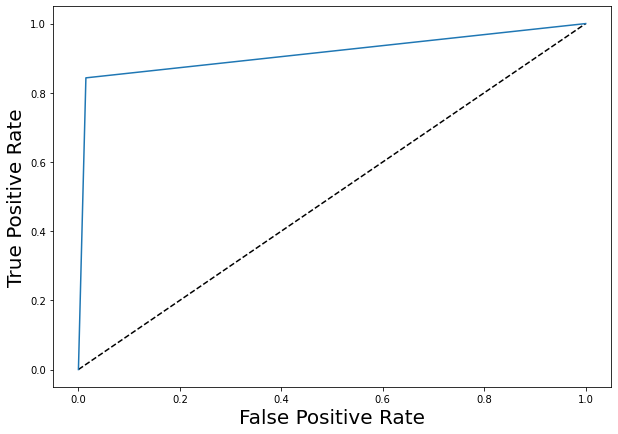

In [131]:
fpr, tpr, _ = roc_curve(y_test, gs.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

In [132]:
confusion_matrix(y_test, gs.predict(X_test))

array([[1676,   25],
       [  51,  274]])

AdaBoostClassifier показал результаты лучше чем лес. Recall выше на 4%, precision ниже на 1%, f1-score выше на 2%, macro-avg выше на 1%.

## GradientBoostingClassifier

In [133]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('gradboosting',GradientBoostingClassifier())])
params={}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [134]:
gs=gs.fit(X_train,y_train)

In [ ]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.93      0.83      0.88       325

    accuracy                           0.96      2026
   macro avg       0.95      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



ROC AUC = 0.9110


Text(0.5, 0, 'False Positive Rate')

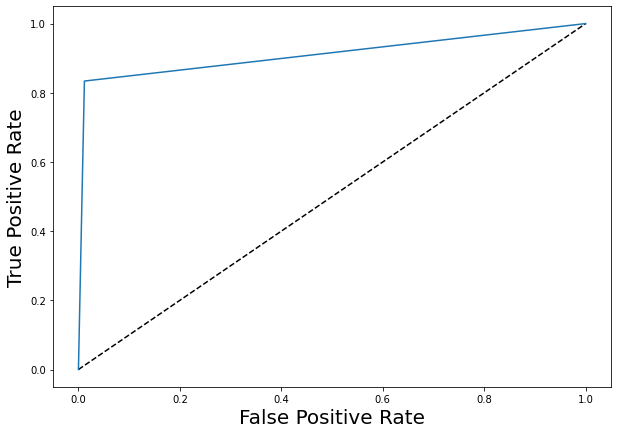

In [135]:
fpr, tpr, _ = roc_curve(y_test, gs.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

In [136]:
confusion_matrix(y_test, gs.predict(X_test))

array([[1681,   20],
       [  54,  271]])

Результаты такие же как и у adaboost

# Решение задачи с настройкой параметров

## Logistic Regression(с настройкой параметров)

In [137]:
pipe=Pipeline(steps=[('ss',StandardScaler()),("poly",PolynomialFeatures()),('lr',LogisticRegression())])
params={
    "poly__degree":[1,2,3],
    "lr__C":[0.9,1.0,1.1],
    "lr__class_weight":[None,'balanced']
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [138]:
gs=gs.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [182]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('lr', LogisticRegression(C=0.9))]),
 {'lr__C': 0.9, 'lr__class_weight': None, 'poly__degree': 2})

In [183]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1701
           1       0.87      0.74      0.80       325

    accuracy                           0.94      2026
   macro avg       0.91      0.86      0.88      2026
weighted avg       0.94      0.94      0.94      2026



ROC AUC = 0.8586


Text(0.5, 0, 'False Positive Rate')

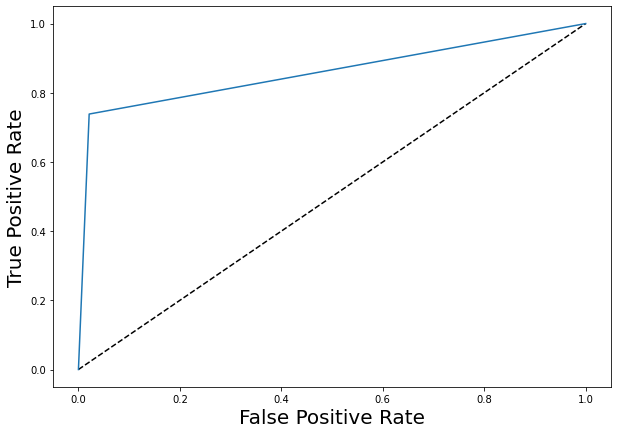

In [140]:
fpr, tpr, _ = roc_curve(y_test, gs.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

По сравнению с Logistic Regression без настроек, новый алгоритм получил лучше резульаты.<br>
Precision лучше на 6%, recall лучше на 16%, f1-score лучше на 12%, macro-avg лучше на 7%.

## SVM(с настройкой параметров)

In [141]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('svc',SVC())])
params={
   "svc__class_weight":["balanced",None],
   "svc__kernel":["poly","rbf"],
   "svc__degree":[2,3]
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [142]:
gs=gs.fit(X_train,y_train)

In [178]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()), ('svc', SVC(degree=2))]),
 {'svc__class_weight': None, 'svc__degree': 2, 'svc__kernel': 'rbf'})

In [179]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1701
           1       0.88      0.68      0.76       325

    accuracy                           0.93      2026
   macro avg       0.91      0.83      0.86      2026
weighted avg       0.93      0.93      0.93      2026



ROC AUC = 0.8293


Text(0.5, 0, 'False Positive Rate')

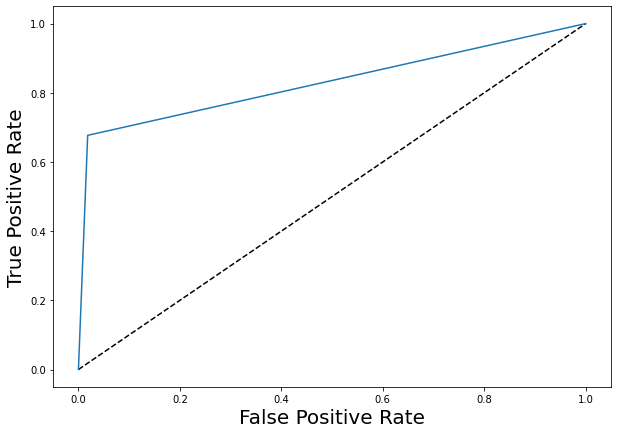

In [144]:
fpr, tpr, _ = roc_curve(y_test, gs.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

По сравнению с SVC без настроек, новый алгоритм получил лучше резульаты.<br>
Precision лучше на 1%, recall лучше на 8%, f1-score лучше на 5%, macro-avg лучше на 3%.

## DecisionTreeClassifier(с настройкой параметров)

In [146]:
pipe=Pipeline(steps=[('tree',DecisionTreeClassifier())])
params={
    'tree__criterion':['gini','entropy'],
    'tree__max_depth':[5,10,15,20,None],
    'tree__min_samples_leaf':[1,2,3],
    'tree__max_features':[None,"auto"]
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [147]:
gs=gs.fit(X_train,y_train)

In [204]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('tree', DecisionTreeClassifier(max_depth=10))]),
 {'tree__criterion': 'gini',
  'tree__max_depth': 10,
  'tree__max_features': None,
  'tree__min_samples_leaf': 1})

In [205]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1701
           1       0.84      0.79      0.82       325

    accuracy                           0.94      2026
   macro avg       0.90      0.88      0.89      2026
weighted avg       0.94      0.94      0.94      2026



ROC AUC = 0.8845


Text(0.5, 0, 'False Positive Rate')

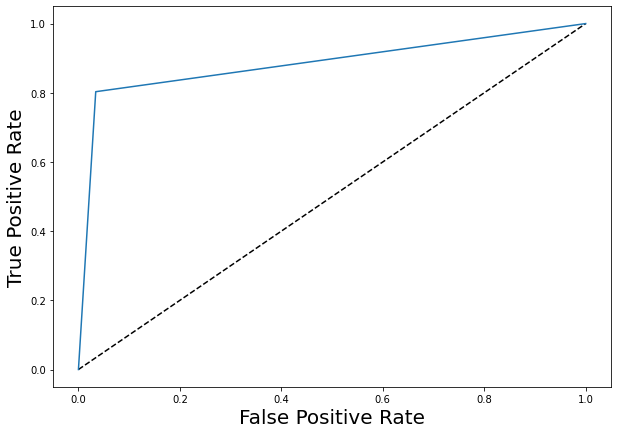

In [148]:
fpr, tpr, _ = roc_curve(y_test, gs.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

По сравнению с DecisionTreeClassifier без настроек, новый алгоритм получил лучше резульаты.<br>
Precision лучше на 3%, recall лучше на 1%, f1-score лучше на 2%, macro-avg лучше на 1%.

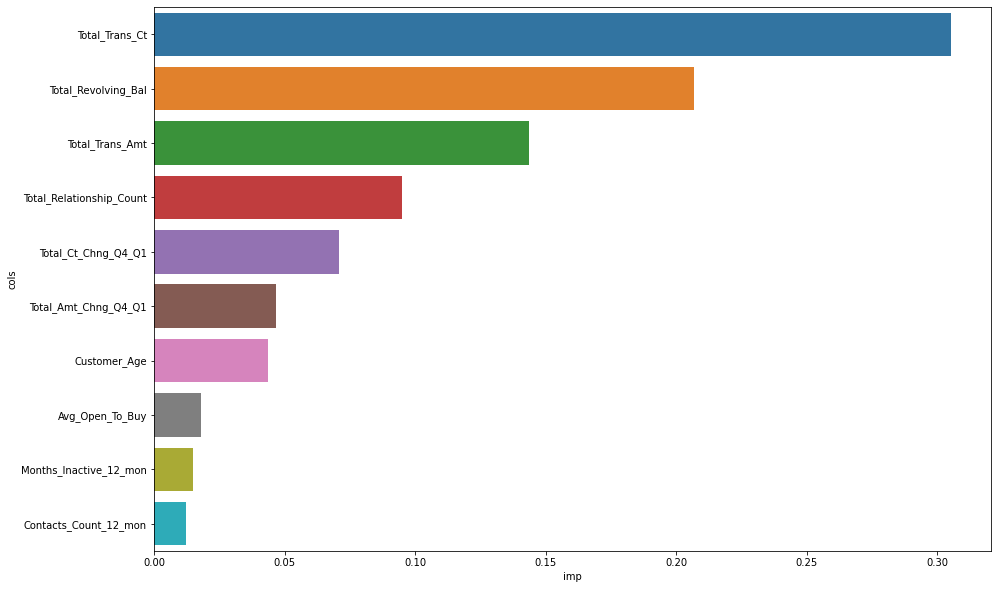

In [206]:
plot_feature_imp(gs.best_estimator_.steps[0][1],df.loc[:,df.columns!="Attrition_Flag"].columns,10)

## RandomForestClassifier(с настройкой параметров)

In [149]:
pipe=Pipeline(steps=[('forest',RandomForestClassifier())])
params={
    'forest__n_estimators':[100,120],
    'forest__criterion':['gini', 'entropy'],
    'forest__max_depth':[5,10,None],
    'forest__class_weight':['balanced',None]
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [150]:
gs=gs.fit(X_train,y_train)

In [213]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('forest', RandomForestClassifier(criterion='entropy'))]),
 {'forest__class_weight': None,
  'forest__criterion': 'entropy',
  'forest__max_depth': None,
  'forest__n_estimators': 100})

In [211]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.94      0.78      0.85       325

    accuracy                           0.96      2026
   macro avg       0.95      0.88      0.91      2026
weighted avg       0.96      0.96      0.95      2026



ROC AUC = 0.8929


Text(0.5, 0, 'False Positive Rate')

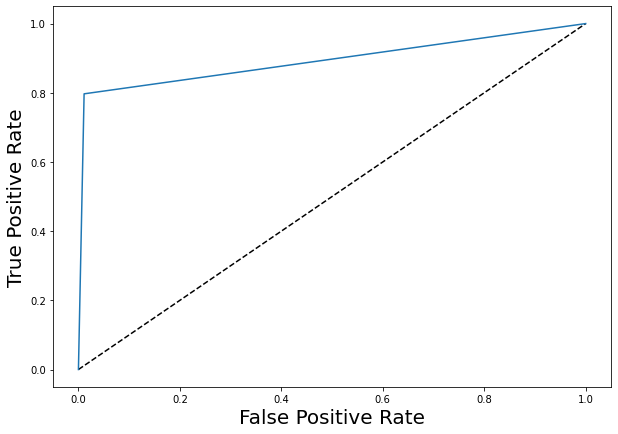

In [152]:
fpr, tpr, _ = roc_curve(y_test, gs.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

По сравнению с RandomForestClassifier без настроек, новый алгоритм получил лучше резульаты.<br>
Precision лучше на 1%, recall хуже на 2%, f1-score хуже на 1%, macro-avg хуже на 1%.

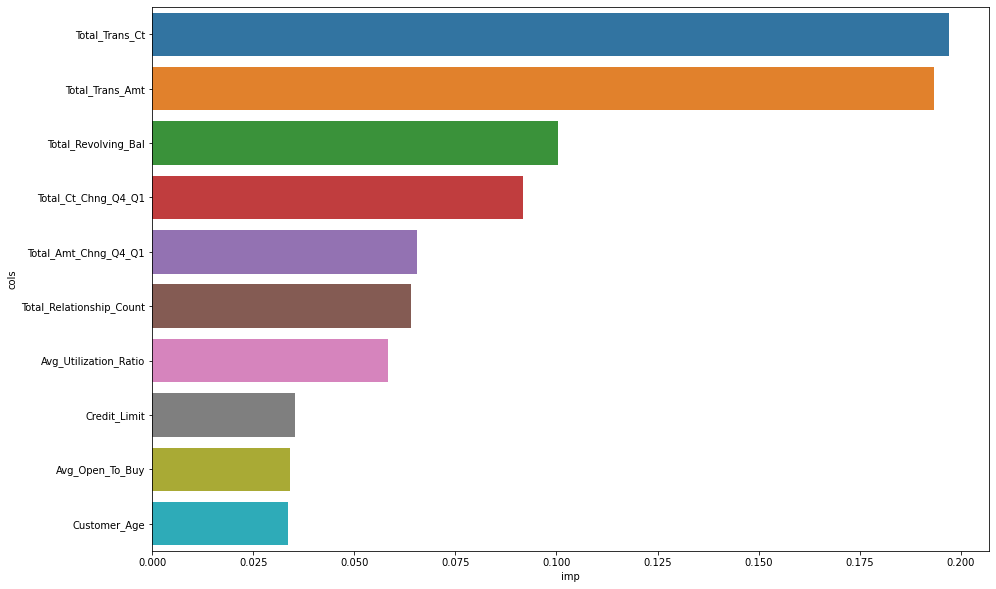

In [212]:
plot_feature_imp(gs.best_estimator_.steps[0][1],df.loc[:,df.columns!="Attrition_Flag"].columns,10)

## AdaBoostClassifier(с настройкой параметров)

Adaboost это мета алгорит, поэтому в качестве базового алгоритма можно использовать любой

### AdaBoostClassifier(LogisticRegression)

In [155]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('poly',PolynomialFeatures()),('adaboost',AdaBoostClassifier(base_estimator=LogisticRegression()))])
params={
    "adaboost__base_estimator__C":[3,4,10,20,30],
    "adaboost__base_estimator__class_weight":[None,'balanced'],
    "poly__degree":[2]
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [156]:
gs=gs.fit(X_train,y_train)

In [48]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('adaboost',
                  AdaBoostClassifier(base_estimator=LogisticRegression(C=10)))]),
 {'adaboost__base_estimator__C': 10,
  'adaboost__base_estimator__class_weight': None,
  'poly__degree': 2})

In [49]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1701
           1       0.85      0.74      0.79       325

    accuracy                           0.94      2026
   macro avg       0.90      0.86      0.88      2026
weighted avg       0.94      0.94      0.94      2026



ROC AUC = 0.8597


Text(0.5, 0, 'False Positive Rate')

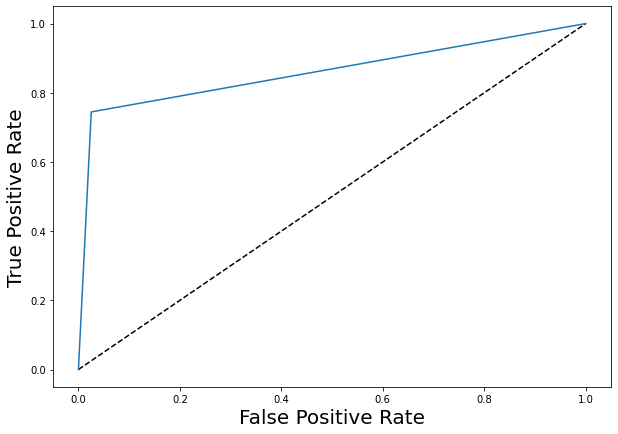

In [157]:
fpr, tpr, _ = roc_curve(y_test, gs.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

Обычная логистическая регрессия показала результаты похожие на те, что и AdaBoostClassifier(LogisticRegression), потому что для того чтобы адабуст хорошо работал, базовый алгоритм должен быть плохим, то есть точномть должна быть чуть выше 50%, чтобы в среднем все алгоритмы давали хороший результат, а логистическая регрессия делает хорошие прогнозы даже несмотря на высокую С=10(высокая для того чтобы variance была высокая)

### AdaBoostClassifier(DecisionTreeClassifier)

In [158]:
pipe=Pipeline(steps=[('adaboost',AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])
params={
    "adaboost__base_estimator__criterion":["gini","entropy"],
    "adaboost__base_estimator__max_depth":[1,2],
    "adaboost__base_estimator__max_features":["auto",None],
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [159]:
gs=gs.fit(X_train,y_train)

In [58]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('adaboost',
                  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                           max_depth=2)))]),
 {'adaboost__base_estimator__criterion': 'entropy',
  'adaboost__base_estimator__max_depth': 2,
  'adaboost__base_estimator__max_features': None})

In [59]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1701
           1       0.94      0.90      0.92       325

    accuracy                           0.97      2026
   macro avg       0.96      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



ROC AUC = 0.9452


Text(0.5, 0, 'False Positive Rate')

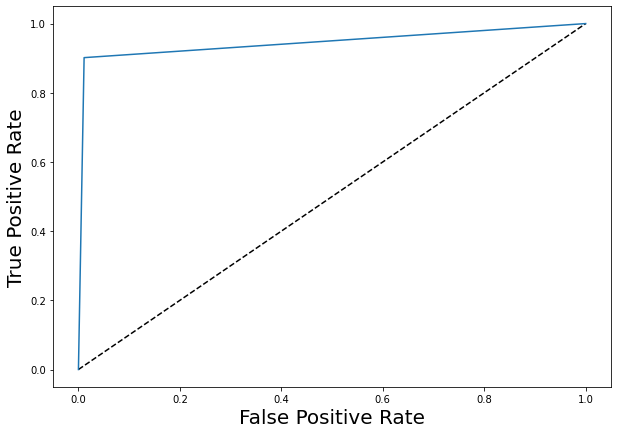

In [160]:
fpr, tpr, _ = roc_curve(y_test, gs.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

По сравнению с AdaBoostClassifier(DecisionTreeClassifier) без настроек, новый алгоритм получил лучше резульаты.<br>
Precision лучше на 2%, recall лучше на 6%, f1-score лучше на 4%, macro-avg лучше на 2%

## GradientBoostingClassifier

In [162]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('gradboosting',GradientBoostingClassifier())])
params={
    "gradboosting__criterion":['friedman_mse','mse'],
    "gradboosting__n_estimators":[100,150,200],
    "gradboosting__max_depth":[1,2,3,4],
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [163]:
gs=gs.fit(X_train,y_train)

In [63]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()),
                 ('gradboosting',
                  GradientBoostingClassifier(max_depth=4, n_estimators=150))]),
 {'gradboosting__criterion': 'friedman_mse',
  'gradboosting__max_depth': 4,
  'gradboosting__n_estimators': 150})

In [62]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.88      0.90       325

    accuracy                           0.97      2026
   macro avg       0.96      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



ROC AUC = 0.9326


Text(0.5, 0, 'False Positive Rate')

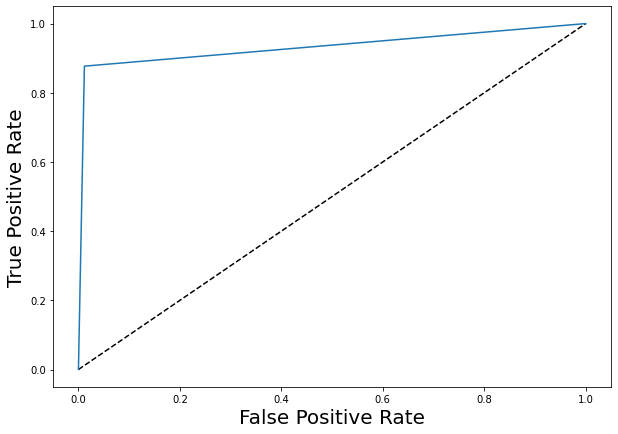

In [164]:
fpr, tpr, _ = roc_curve(y_test, gs.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

По сравнению с GradientBoostingClassifier без настроек, новый алгоритм получил лучше резульаты.<br>
Precision лучше точно такой же, recall лучше на 5%, f1-score лучше на 2%, macro-avg лучше на 1%

## CatBoostClassifier

In [165]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [166]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=1000,)

cbc=cbc.fit(X_train, y_train)

In [69]:
y_hat=cbc.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.94      0.89      0.91       325

    accuracy                           0.97      2026
   macro avg       0.96      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



ROC AUC = 0.9378


Text(0.5, 0, 'False Positive Rate')

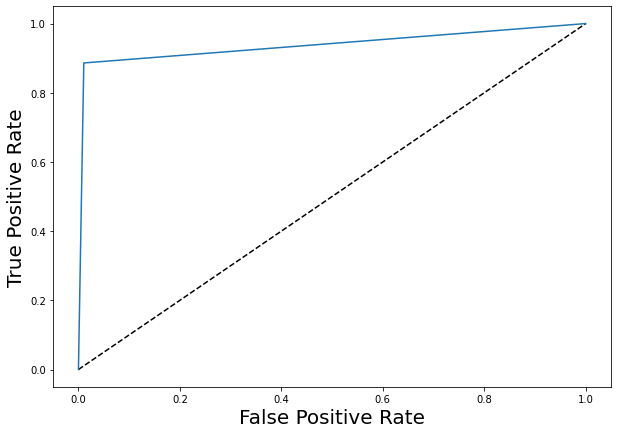

In [168]:
fpr, tpr, _ = roc_curve(y_test, cbc.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

CatBoostClassifier без настройки парамеров показал лучше результаты чем gradient boosting с настройкой парамтров, потому что он может работать несбалансированными классами.<br> 
Precision лучше на 1%, recall лучше на 1%, f1-score лучше на 1%, macro-avg лучше на 1%

## Градиентный бустинг(xgboost)

In [169]:
import xgboost as xgb

In [ ]:
param_dist = {'objective':'binary:logistic', 'n_estimators':300}
gbc = xgb.XGBClassifier(**param_dist)
gbc=gbc.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='logloss')

In [82]:
y_hat=gbc.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.94      0.89      0.92       325

    accuracy                           0.97      2026
   macro avg       0.96      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



ROC AUC = 0.9412


Text(0.5, 0, 'False Positive Rate')

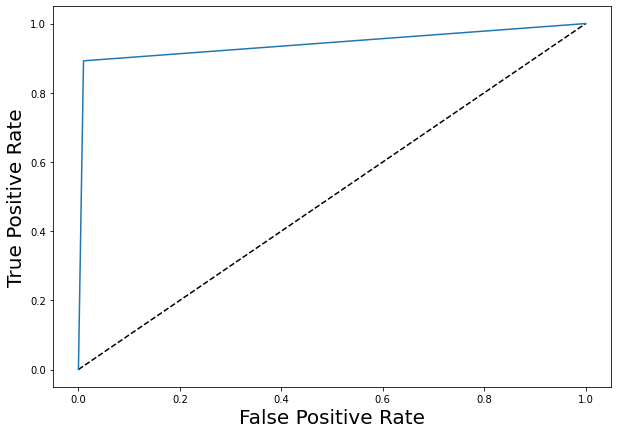

In [171]:
fpr, tpr, _ = roc_curve(y_test, gbc.predict(X_test))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

Градиентный бустинг из xgboost без настройки парамеров показал лучше результаты чем gradient boosting из библиотеки sklearn.ensemble с настройкой парамтров, потому что библиотека xgboost рассчитана на конкретно этот алгоритм<br>
Precision лучше на 1%, recall лучше на 1%, f1-score лучше на 2%, macro-avg лучше на 1%

# Аугментация

Данные несбалансированные, поэтому нужно применить ADASYN и TomekLinks

## ADASYN

In [172]:
ada=ADASYN()
X_train_adasyn,y_train_adasyn=ada.fit_resample(X_train,y_train)

In [21]:
sum(y_train_adasyn),len(y_train_adasyn)-sum(y_train_adasyn)

(6857, 6799)

### Logistic Regression(ADASYN)

In [22]:
pipe=Pipeline(steps=[('ss',StandardScaler()),("poly",PolynomialFeatures()),('lr',LogisticRegression())])
params={
    "poly__degree":[1,2,3],
    "lr__C":[0.9,1.0,1.1],
    "lr__class_weight":[None,'balanced']
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [23]:
gs=gs.fit(X_train_adasyn,y_train_adasyn)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [24]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()),
                 ('poly', PolynomialFeatures(degree=3)),
                 ('lr', LogisticRegression(C=1.1, class_weight='balanced'))]),
 {'lr__C': 1.1, 'lr__class_weight': 'balanced', 'poly__degree': 3})

In [25]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1701
           1       0.76      0.76      0.76       325

    accuracy                           0.92      2026
   macro avg       0.86      0.86      0.86      2026
weighted avg       0.92      0.92      0.92      2026



Logistic Regression с применением ADASYN показал хуже результаты чем Logistic Regression без применения ADASYN.<br>
Precision хуже на 11%, recall лучше на 2%, f1-score хуже на 4%, macro-avg хуже на 2%

### SVC(ADASYN)

In [26]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('svc',SVC())])
params={
   "svc__class_weight":["balanced",None],
   "svc__kernel":["poly","rbf"],
   "svc__degree":[2,3]
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [27]:
gs=gs.fit(X_train_adasyn,y_train_adasyn)

In [28]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()),
                 ('svc', SVC(class_weight='balanced', degree=2))]),
 {'svc__class_weight': 'balanced', 'svc__degree': 2, 'svc__kernel': 'rbf'})

In [29]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1701
           1       0.74      0.84      0.79       325

    accuracy                           0.93      2026
   macro avg       0.86      0.89      0.87      2026
weighted avg       0.93      0.93      0.93      2026



SVC с применением ADASYN показал лучше результаты чем SVC без применения ADASYN.<br>
Precision хуже на 14%, recall лучше на 16%, f1-score лучше на 3%, macro-avg хуже на 1%

### DecisionTreeClassifier(ADASYN)

In [30]:
pipe=Pipeline(steps=[('tree',DecisionTreeClassifier())])
params={
    'tree__criterion':['gini','entropy'],
    'tree__max_depth':[5,10,15,20,None],
    'tree__min_samples_leaf':[1,2,3],
    'tree__max_features':[None,"auto"]
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [31]:
gs=gs.fit(X_train_adasyn,y_train_adasyn)

In [32]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('tree', DecisionTreeClassifier(criterion='entropy'))]),
 {'tree__criterion': 'entropy',
  'tree__max_depth': None,
  'tree__max_features': None,
  'tree__min_samples_leaf': 1})

In [34]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1701
           1       0.77      0.82      0.79       325

    accuracy                           0.93      2026
   macro avg       0.87      0.88      0.87      2026
weighted avg       0.93      0.93      0.93      2026



DecisionTreeClassifier с применением ADASYN показал хуже результаты чем DecisionTreeClassifier без применения ADASYN.<br>
Precision хуже на 7%, recall лучше на 3%, f1-score хуже на 2%, macro-avg хуже на 2%

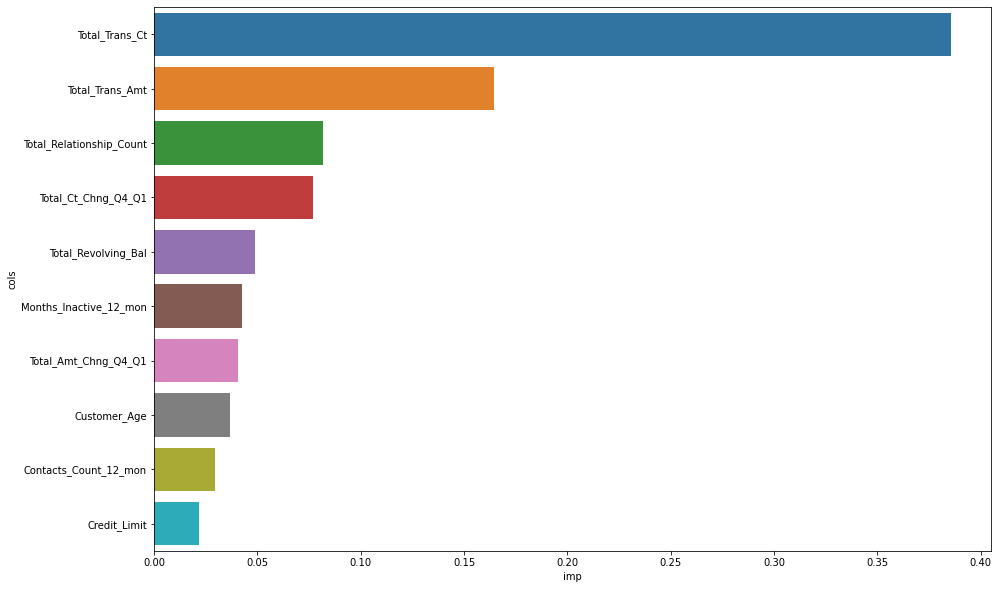

In [37]:
plot_feature_imp(gs.best_estimator_.steps[0][1],df.loc[:,df.columns!="Attrition_Flag"].columns,10)

### RandomForestClassifier(ADASYN)

In [38]:
pipe=Pipeline(steps=[('forest',RandomForestClassifier())])
params={
    'forest__n_estimators':[100,120],
    'forest__criterion':['gini', 'entropy'],
    'forest__max_depth':[5,10,None],
    'forest__class_weight':['balanced',None]
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [39]:
gs=gs.fit(X_train_adasyn,y_train_adasyn)

In [40]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('forest', RandomForestClassifier(criterion='entropy'))]),
 {'forest__class_weight': None,
  'forest__criterion': 'entropy',
  'forest__max_depth': None,
  'forest__n_estimators': 100})

In [41]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1701
           1       0.88      0.84      0.86       325

    accuracy                           0.96      2026
   macro avg       0.93      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



RandomForestClassifier с применением ADASYN показал лучше результаты чем RandomForestClassifier без применения ADASYN.<br>
Precision хуже на 6%, recall лучше на 6%, f1-score лучше на 1%, macro-avg лучше на 1%

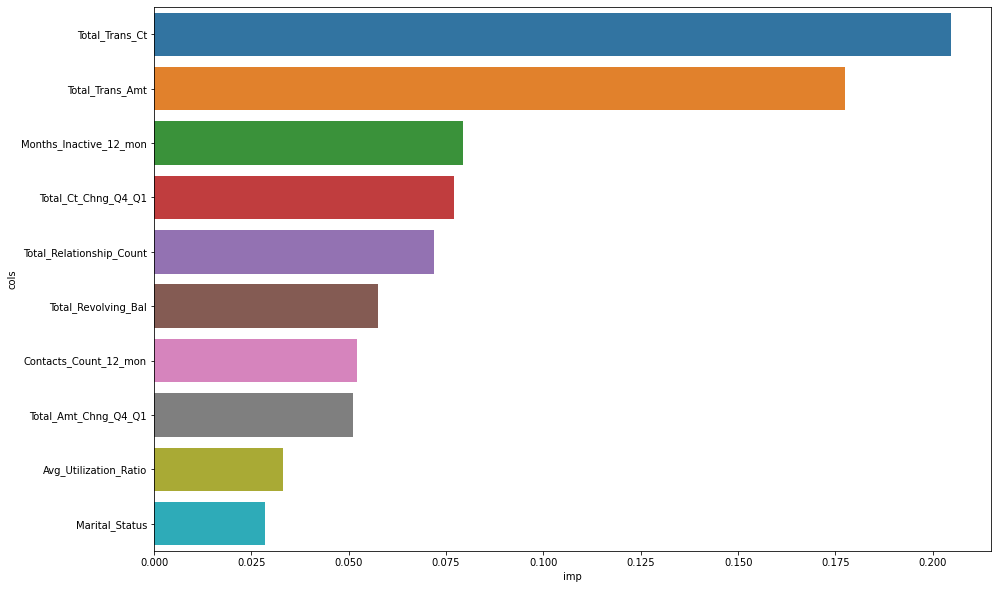

In [42]:
plot_feature_imp(gs.best_estimator_.steps[0][1],df.loc[:,df.columns!="Attrition_Flag"].columns,10)

### AdaBoostClassifier(ASASYN)

#### AdaBoostClassifier(LogisticRegression)(ADASYN)

In [43]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('poly',PolynomialFeatures()),('adaboost',AdaBoostClassifier(base_estimator=LogisticRegression()))])
params={
    "adaboost__base_estimator__C":[3,4,10,20,30],
    "adaboost__base_estimator__class_weight":[None,'balanced'],
    "poly__degree":[2]
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [44]:
gs=gs.fit(X_train_adasyn,y_train_adasyn)

In [45]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('adaboost',
                  AdaBoostClassifier(base_estimator=LogisticRegression(C=10,
                                                                       class_weight='balanced')))]),
 {'adaboost__base_estimator__C': 10,
  'adaboost__base_estimator__class_weight': 'balanced',
  'poly__degree': 2})

In [46]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1701
           1       0.70      0.82      0.76       325

    accuracy                           0.92      2026
   macro avg       0.83      0.88      0.85      2026
weighted avg       0.92      0.92      0.92      2026



AdaBoostClassifier(LogisticRegression) с применением ADASYN показал хуже результаты чем AdaBoostClassifier(LogisticRegression) без применения ADASYN.<br>
Precision хуже на 15%, recall лучше на 8%, f1-score хуже на 3%, macro-avg хуже на 3%

#### AdaBoostClassifier(DecisionTreeClassifier)(ADASYN)

In [47]:
pipe=Pipeline(steps=[('adaboost',AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])
params={
    "adaboost__base_estimator__criterion":["gini","entropy"],
    "adaboost__base_estimator__max_depth":[1,2],
    "adaboost__base_estimator__max_features":["auto",None],
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [48]:
gs=gs.fit(X_train_adasyn,y_train_adasyn)

In [49]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('adaboost',
                  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                                           max_features='auto')))]),
 {'adaboost__base_estimator__criterion': 'gini',
  'adaboost__base_estimator__max_depth': 1,
  'adaboost__base_estimator__max_features': 'auto'})

In [50]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1701
           1       0.79      0.89      0.84       325

    accuracy                           0.94      2026
   macro avg       0.89      0.92      0.90      2026
weighted avg       0.95      0.94      0.95      2026



AdaBoostClassifier(DecisionTreeClassifier) с применением ADASYN показал хуже результаты чем AdaBoostClassifier(DecisionTreeClassifier) без применения ADASYN.<br>
Precision хуже на 5%, recall лучше на 1%, f1-score хуже на 8%, macro-avg хуже на 5%

### GradientBoostingClassifier(ADASYN)

In [53]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('gradboosting',GradientBoostingClassifier())])
params={
    "gradboosting__criterion":['friedman_mse','mse'],
    "gradboosting__n_estimators":[100,150,200],
    "gradboosting__max_depth":[1,2,3,4],
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [54]:
gs=gs.fit(X_train_adasyn,y_train_adasyn)

In [55]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()),
                 ('gradboosting', GradientBoostingClassifier())]),
 {'gradboosting__criterion': 'friedman_mse',
  'gradboosting__max_depth': 3,
  'gradboosting__n_estimators': 100})

In [56]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1701
           1       0.86      0.89      0.87       325

    accuracy                           0.96      2026
   macro avg       0.92      0.93      0.92      2026
weighted avg       0.96      0.96      0.96      2026



GradientBoostingClassifier с применением ADASYN показал хуже результаты чем GradientBoostingClassifier без применения ADASYN.<br>
Precision хуже на 7%, recall лучше на 1%, f1-score хуже на 3%, macro-avg хуже на 2%

### CatBoostClassifier(ADASYN)

In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=1000,)

cbc=cbc.fit(X_train_adasyn,y_train_adasyn)

In [58]:
y_hat=cbc.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1701
           1       0.93      0.92      0.92       325

    accuracy                           0.98      2026
   macro avg       0.96      0.95      0.95      2026
weighted avg       0.98      0.98      0.98      2026



CatBoostClassifier с применением ADASYN показал лучше результаты чем CatBoostClassifier без применения ADASYN.<br>
Precision хуже на 1%, recall лучше на 3%, f1-score лучше на 1%, macro-avg точно такой же.

### Градиентный бустинг(xgboost)(ADASYN)

In [59]:
import xgboost as xgb

In [ ]:
param_dist = {'objective':'binary:logistic', 'n_estimators':300}
gbc = xgb.XGBClassifier(**param_dist)
gbc=gbc.fit(X_train_adasyn,y_train_adasyn,eval_set=[(X_test,y_test)],eval_metric='logloss')

In [61]:
y_hat=gbc.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.91      0.92       325

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



Градиентный бустинг(xgboost) с применением ADASYN точно такие же результаты как и Градиентный бустинг(xgboost) без применения ADASYN.

### <h3>Вывод по ADASYN</h3>

<h5>После применения ADASYN к тренировочным данным, во всех алгоритмах recall вырос с средним на 6-8%, это означает что благодаря уплотненю данных алгоритм стал лучше выделять данный класс, но при этом precision упал, это означает что алгоритм хуже отделяет конкретный класс от других</h5>

## TomekLinks

### TomekLinks(sampling_strategy=all)

In [62]:
tl=TomekLinks(sampling_strategy='all')

In [63]:
X_train_tomek,y_train_tomek=tl.fit_resample(X_train,y_train)

In [65]:
sum(y_train), len(y_train)-sum(y_train)

(1302, 6799)

In [66]:
sum(y_train_tomek), len(y_train_tomek)-sum(y_train_tomek)

(1011, 6508)

#### AdaBoostClassifier(TomekLinks(sampling_strategy="all")

##### AdaBoostClassifier(LogisticRegression)(TomekLinks(sampling_strategy="all"))

In [67]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('poly',PolynomialFeatures()),('adaboost',AdaBoostClassifier(base_estimator=LogisticRegression()))])
params={
    "adaboost__base_estimator__C":[3,4,10,20,30],
    "adaboost__base_estimator__class_weight":[None,'balanced'],
    "poly__degree":[2]
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [68]:
gs=gs.fit(X_train_tomek,y_train_tomek)

In [69]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('adaboost',
                  AdaBoostClassifier(base_estimator=LogisticRegression(C=3)))]),
 {'adaboost__base_estimator__C': 3,
  'adaboost__base_estimator__class_weight': None,
  'poly__degree': 2})

In [71]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1701
           1       0.86      0.68      0.76       325

    accuracy                           0.93      2026
   macro avg       0.90      0.83      0.86      2026
weighted avg       0.93      0.93      0.93      2026



AdaBoostClassifier(LogisticRegression) с применением Tomeklinks показал хуже результаты чем AdaBoostClassifier(LogisticRegression) без применения Tomeklinks.<br>
Precision лучше на 1%, recall хуже на 6%, f1-score хуже на 3%, macro-avg хуже на 2%.

##### AdaBoostClassifier(DecisionTreeClassifier)(TomekLinks(sampling_strategy="all")

In [77]:
pipe=Pipeline(steps=[('adaboost',AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])
params={
    "adaboost__base_estimator__criterion":["gini","entropy"],
    "adaboost__base_estimator__max_depth":[1,2],
    "adaboost__base_estimator__max_features":["auto",None],
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [78]:
gs=gs.fit(X_train_tomek,y_train_tomek)

In [79]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('adaboost',
                  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)))]),
 {'adaboost__base_estimator__criterion': 'gini',
  'adaboost__base_estimator__max_depth': 2,
  'adaboost__base_estimator__max_features': None})

In [80]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.87      0.90       325

    accuracy                           0.97      2026
   macro avg       0.96      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



AdaBoostClassifier(DecisionTreeClassifier) с применением Tomeklinks показал хуже результаты чем AdaBoostClassifier(DecisionTreeClassifier) без применения Tomeklinks.
Precision хуже на 1%, recall хуже на 3%, f1-score хуже на 2%, macro-avg хуже на 1%.

#### GradientBoostingClassifier(TomekLinks(sampling_strategy="all")

In [81]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('gradboosting',GradientBoostingClassifier())])
params={
    "gradboosting__criterion":['friedman_mse','mse'],
    "gradboosting__n_estimators":[100,150,200],
    "gradboosting__max_depth":[1,2,3,4],
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [82]:
gs=gs.fit(X_train_tomek,y_train_tomek)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: C

In [83]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()),
                 ('gradboosting',
                  GradientBoostingClassifier(criterion='mse',
                                             n_estimators=200))]),
 {'gradboosting__criterion': 'mse',
  'gradboosting__max_depth': 3,
  'gradboosting__n_estimators': 200})

In [85]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.94      0.84      0.89       325

    accuracy                           0.97      2026
   macro avg       0.96      0.92      0.93      2026
weighted avg       0.97      0.97      0.97      2026



GradientBoostingClassifier с применением Tomeklinks показал хуже результаты чем GradientBoostingClassifier без применения Tomeklinks.
Precision лучше на 1%, recall хуже на 4%, f1-score хуже на 1%, macro-avg хуже на 1%.

#### CatBoostClassifier(TomekLinks(sampling_strategy="all")

In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=1000,)

cbc=cbc.fit(X_train_tomek,y_train_tomek)

In [88]:
y_hat=cbc.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.94      0.84      0.89       325

    accuracy                           0.97      2026
   macro avg       0.96      0.92      0.93      2026
weighted avg       0.97      0.97      0.97      2026



CatBoostClassifier с применением Tomeklinks показал хуже результаты чем CatBoostClassifier без применения Tomeklinks.<br>
Precision точно такой же, recall хуже на 5%, f1-score хуже на 2%, macro-avg хуже на 2%.

#### Градиентный бустинг(xgboost)(TomekLinks(sampling_strategy="all")

In [89]:
import xgboost as xgb

In [ ]:
param_dist = {'objective':'binary:logistic', 'n_estimators':300}
gbc = xgb.XGBClassifier(**param_dist)
gbc=gbc.fit(X_train_tomek,y_train_tomek,eval_set=[(X_test,y_test)],eval_metric='logloss')

In [91]:
y_hat=gbc.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1701
           1       0.94      0.86      0.90       325

    accuracy                           0.97      2026
   macro avg       0.96      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



Градиентный бустинг(xgboost) с применением Tomeklinks показал хуже результаты чем Градиентный бустинг(xgboost) без применения Tomeklinks.
Precision точно такой же, recall хуже на 3%, f1-score хуже на 2%, macro-avg хуже на 1%.

#### Вывод по TomekLinks sampling_strategy="all"

После применения TomekLinks sampling_strategy="all" у алгоритма упали все оценки, следовательно такая стратегия не работает 

### TomekLinks(sampling_strategy=majority)

In [23]:
tl=TomekLinks(sampling_strategy='majority')

In [24]:
X_train_tomek,y_train_tomek=tl.fit_resample(X_train,y_train)

In [25]:
sum(y_train), len(y_train)-sum(y_train)

(1302, 6799)

In [26]:
sum(y_train_tomek), len(y_train_tomek)-sum(y_train_tomek)

(1302, 6508)

#### AdaBoostClassifier(TomekLinks(sampling_strategy="majority")

##### AdaBoostClassifier(LogisticRegression)(TomekLinks(sampling_strategy="majority"))

In [27]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('poly',PolynomialFeatures()),('adaboost',AdaBoostClassifier(base_estimator=LogisticRegression()))])
params={
    "adaboost__base_estimator__C":[3,4,10,20,30],
    "adaboost__base_estimator__class_weight":[None,'balanced'],
    "poly__degree":[2]
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [28]:
gs=gs.fit(X_train_tomek,y_train_tomek)

In [29]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('adaboost',
                  AdaBoostClassifier(base_estimator=LogisticRegression(C=3)))]),
 {'adaboost__base_estimator__C': 3,
  'adaboost__base_estimator__class_weight': None,
  'poly__degree': 2})

In [30]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1701
           1       0.84      0.74      0.78       325

    accuracy                           0.93      2026
   macro avg       0.89      0.86      0.87      2026
weighted avg       0.93      0.93      0.93      2026



AdaBoostClassifier(LogisticRegression) с применением Tomeklinks показал такие же результаты как и AdaBoostClassifier(LogisticRegression) без применения Tomeklinks.

##### AdaBoostClassifier(DecisionTreeClassifier)(TomekLinks(sampling_strategy="majority")

In [31]:
pipe=Pipeline(steps=[('adaboost',AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])
params={
    "adaboost__base_estimator__criterion":["gini","entropy"],
    "adaboost__base_estimator__max_depth":[1,2],
    "adaboost__base_estimator__max_features":["auto",None],
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [32]:
gs=gs.fit(X_train_tomek,y_train_tomek)

In [33]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('adaboost',
                  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)))]),
 {'adaboost__base_estimator__criterion': 'gini',
  'adaboost__base_estimator__max_depth': 2,
  'adaboost__base_estimator__max_features': None})

In [34]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.90      0.90      0.90       325

    accuracy                           0.97      2026
   macro avg       0.94      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026



AdaBoostClassifier(DecisionTreeClassifier) с применением Tomeklinks показал хуже результаты чем AdaBoostClassifier(DecisionTreeClassifier) без применения Tomeklinks.
Precision хуже на 4%, recall точно такой же, f1-score хуже на 2%, macro-avg хуже на 1%.

#### GradientBoostingClassifier(TomekLinks(sampling_strategy="majority")

In [35]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('gradboosting',GradientBoostingClassifier())])
params={
    "gradboosting__criterion":['friedman_mse','mse'],
    "gradboosting__n_estimators":[100,150,200],
    "gradboosting__max_depth":[1,2,3,4],
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [36]:
gs=gs.fit(X_train_tomek,y_train_tomek)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:475: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: C

In [37]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()),
                 ('gradboosting',
                  GradientBoostingClassifier(criterion='mse', max_depth=4,
                                             n_estimators=200))]),
 {'gradboosting__criterion': 'mse',
  'gradboosting__max_depth': 4,
  'gradboosting__n_estimators': 200})

In [38]:
y_hat=gs.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.94      0.89      0.91       325

    accuracy                           0.97      2026
   macro avg       0.96      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



GradientBoostingClassifier с применением Tomeklinks показал лучше результаты чем GradientBoostingClassifier без применения Tomeklinks.<br>
Precision лучше на 1%, recall лучше на 1%, f1-score лучше на 1%, macro-avg лучше на 1%.

#### CatBoostClassifier(TomekLinks(sampling_strategy="majority")

In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=1000,)

cbc=cbc.fit(X_train_tomek,y_train_tomek)

In [43]:
y_hat=cbc.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1701
           1       0.93      0.91      0.92       325

    accuracy                           0.97      2026
   macro avg       0.96      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



CatBoostClassifier с применением Tomeklinks показал лучше результаты чем CatBoostClassifier без применения Tomeklinks.<br>
Precision хуже на 1%, recall лучше на 2%, f1-score лучше на 1%, macro-avg точно такой же.

#### Градиентный бустинг(xgboost)(TomekLinks(sampling_strategy="majority")

In [44]:
import xgboost as xgb

In [ ]:
param_dist = {'objective':'binary:logistic', 'n_estimators':300}
gbc = xgb.XGBClassifier(**param_dist)
gbc=gbc.fit(X_train_tomek,y_train_tomek,eval_set=[(X_test,y_test)],eval_metric='logloss')

In [46]:
y_hat=gbc.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.92      0.91      0.92       325

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026



Градиентный бустинг(xgboost) с применением Tomeklinks показал почти точно такие же результаты как и Градиентный бустинг(xgboost) без применения Tomeklinks.

#### Вывод по TomekLinks(sampling_strategy="majority")

В среднем результаты все результаты лучше на 1-2%. TomekLinks(sampling_strategy="majority") показал свою эффективность

#Down-sampling

Down-sampling относится к удалению записей из большинства классов для создания более сбалансированного набора данных. Dataset несбалансированный, поэтому можно применить эту стратегию.

In [206]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [207]:
df_majority = df[df.Attrition_Flag=="Existing Customer"]
df_minority = df[df.Attrition_Flag=="Attrited Customer"]

In [208]:
df_majority_downsampled = df_majority.sample( 
                                 replace=False,    
                                 n=len(df_minority)-1,
                                 random_state=1234) 

In [209]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [210]:
df_downsampled.Attrition_Flag.value_counts()

Attrited Customer    1627
Existing Customer    1626
Name: Attrition_Flag, dtype: int64

## Кодирование данных

In [211]:
df_downsampled_label_enc,encoders=encode_df(df_downsampled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [212]:
df_downsampled_label_enc.Attrition_Flag.value_counts()

0    1627
1    1626
Name: Attrition_Flag, dtype: int64

## Разделение на train/test

In [213]:
X_downsampled=df_downsampled_label_enc.drop(columns=['Attrition_Flag'])
Y_downsampled=df_downsampled_label_enc['Attrition_Flag']

In [214]:
X_train_downsampled,X_test_downsampled,y_train_downsampled,y_test_downsampled=train_test_split(X_downsampled,Y_downsampled,test_size=0.2,random_state=123)

In [215]:
y_train_downsampled.value_counts()

0    1305
1    1297
Name: Attrition_Flag, dtype: int64

In [216]:
y_train_downsampled.value_counts(normalize=True)

0    0.501537
1    0.498463
Name: Attrition_Flag, dtype: float64

In [217]:
y_test_downsampled.value_counts()

1    329
0    322
Name: Attrition_Flag, dtype: int64

In [218]:
y_test_downsampled.value_counts(normalize=True)

1    0.505376
0    0.494624
Name: Attrition_Flag, dtype: float64

In [219]:
X_train_downsampled=np.array(X_train_downsampled)
X_test_downsampled=np.array(X_test_downsampled)
y_train_downsampled=np.array(y_train_downsampled)
y_test_downsampled=np.array(y_test_downsampled)

## AdaBoostClassifier(с настройкой параметров)

Adaboost это мета алгорит, поэтому в качестве базового алгоритма можно использовать любой

### AdaBoostClassifier(LogisticRegression)

In [35]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('poly',PolynomialFeatures()),('adaboost',AdaBoostClassifier(base_estimator=LogisticRegression()))])
params={
    "adaboost__base_estimator__C":[3,4,10,20,30],
    "adaboost__base_estimator__class_weight":[None,'balanced'],
    "poly__degree":[2]
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [36]:
gs=gs.fit(X_train_downsampled,y_train_downsampled)

In [37]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('adaboost',
                  AdaBoostClassifier(base_estimator=LogisticRegression(C=30,
                                                                       class_weight='balanced')))]),
 {'adaboost__base_estimator__C': 30,
  'adaboost__base_estimator__class_weight': 'balanced',
  'poly__degree': 2})

In [38]:
y_hat=gs.predict(X_test_downsampled)
print(classification_report(y_test_downsampled,y_hat))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       322
           1       0.86      0.88      0.87       329

    accuracy                           0.87       651
   macro avg       0.87      0.87      0.87       651
weighted avg       0.87      0.87      0.87       651



Macro-avg на 1% ниже чем тот же самый алгоритм но без downsampling

### AdaBoostClassifier(DecisionTreeClassifier)

In [39]:
pipe=Pipeline(steps=[('adaboost',AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])
params={
    "adaboost__base_estimator__criterion":["gini","entropy"],
    "adaboost__base_estimator__max_depth":[1,2],
    "adaboost__base_estimator__max_features":["auto",None],
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [40]:
gs=gs.fit(X_train_downsampled,y_train_downsampled)

In [41]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('adaboost',
                  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                           max_depth=2)))]),
 {'adaboost__base_estimator__criterion': 'entropy',
  'adaboost__base_estimator__max_depth': 2,
  'adaboost__base_estimator__max_features': None})

In [42]:
y_hat=gs.predict(X_test_downsampled)
print(classification_report(y_test_downsampled,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       322
           1       0.94      0.94      0.94       329

    accuracy                           0.94       651
   macro avg       0.94      0.94      0.94       651
weighted avg       0.94      0.94      0.94       651



Macro-avg на 1% ниже чем тот же самый алгоритм но без downsampling

## GradientBoostingClassifier

In [43]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('gradboosting',GradientBoostingClassifier())])
params={
    "gradboosting__criterion":['friedman_mse','mse'],
    "gradboosting__n_estimators":[100,150,200],
    "gradboosting__max_depth":[1,2,3,4],
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [44]:
gs=gs.fit(X_train_downsampled,y_train_downsampled)

In [45]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()),
                 ('gradboosting',
                  GradientBoostingClassifier(max_depth=4, n_estimators=200))]),
 {'gradboosting__criterion': 'friedman_mse',
  'gradboosting__max_depth': 4,
  'gradboosting__n_estimators': 200})

In [46]:
y_hat=gs.predict(X_test_downsampled)
print(classification_report(y_test_downsampled,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       322
           1       0.95      0.95      0.95       329

    accuracy                           0.95       651
   macro avg       0.95      0.95      0.95       651
weighted avg       0.95      0.95      0.95       651



Macro-avg на 1% выше чем тот же самый алгоритм но без downsampling

## CatBoostClassifier

In [193]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [194]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=2000,)

cbc=cbc.fit(X_train_downsampled,y_train_downsampled)

In [221]:
y_hat=cbc.predict(X_test_downsampled)
print(classification_report(y_test_downsampled,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       322
           1       0.95      0.95      0.95       329

    accuracy                           0.95       651
   macro avg       0.95      0.95      0.95       651
weighted avg       0.95      0.95      0.95       651



Macro-avg точно такой же как и у алгоритма но без downsampling

## Градиентный бустинг(xgboost)

In [222]:
import xgboost as xgb

In [ ]:
param_dist = {'objective':'binary:logistic', 'n_estimators':400}
gbc = xgb.XGBClassifier(**param_dist)
gbc=gbc.fit(X_train_downsampled,y_train_downsampled,eval_set=[(X_test_downsampled,y_test_downsampled)],eval_metric='logloss')

In [224]:
y_hat=gbc.predict(X_test_downsampled)
print(classification_report(y_test_downsampled,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       322
           1       0.94      0.95      0.95       329

    accuracy                           0.95       651
   macro avg       0.95      0.95      0.95       651
weighted avg       0.95      0.95      0.95       651



Macro-avg точно такой же как и у алгоритма но без downsampling

## Вывод по downsampling

Алгоритмы после применения downsampling дают точно такие же результаты или чуть хуже

# One-hot

## Кодирование данных

In [173]:
categor_df = df.select_dtypes(include=np.object)
numeric_df = df.select_dtypes(exclude=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [174]:
one_hot_enc = OneHotEncoder()
one_hot_enc.fit(categor_df)
codes = one_hot_enc.transform(categor_df).toarray()
feature_names = one_hot_enc.get_feature_names(categor_df.columns)
df_one_hot = pd.concat([numeric_df,
                        pd.DataFrame(codes,columns=feature_names)], axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [175]:
df_one_hot=df_one_hot.drop(columns=["Attrition_Flag_Existing Customer"])

In [176]:
df_one_hot["Attrition_Flag_Attrited Customer"]=df_one_hot["Attrition_Flag_Attrited Customer"].astype(np.int32)

In [177]:
df_one_hot["Attrition_Flag_Attrited Customer"].value_counts()

0    8500
1    1627
Name: Attrition_Flag_Attrited Customer, dtype: int64

## Разделение на train/test

In [65]:
X_one_hot=df_one_hot.drop(columns=['Attrition_Flag_Attrited Customer'])
Y_one_hot=df_one_hot['Attrition_Flag_Attrited Customer']

In [66]:
X_train_one_hot,X_test_one_hot,y_train_one_hot,y_test_one_hot=train_test_split(X_one_hot,Y_one_hot,test_size=0.2,random_state=123,stratify=Y_one_hot)

In [69]:
X_train_one_hot.shape

(8101, 37)

In [67]:
y_train_one_hot.value_counts()

0    6799
1    1302
Name: Attrition_Flag_Attrited Customer, dtype: int64

In [68]:
y_train_one_hot.value_counts(normalize=True)

0    0.839279
1    0.160721
Name: Attrition_Flag_Attrited Customer, dtype: float64

In [70]:
y_test_one_hot.value_counts()

0    1701
1     325
Name: Attrition_Flag_Attrited Customer, dtype: int64

In [71]:
y_test_one_hot.value_counts(normalize=True)

0    0.839585
1    0.160415
Name: Attrition_Flag_Attrited Customer, dtype: float64

In [178]:
X_train_one_hot=np.array(X_train_one_hot)
X_test_one_hot=np.array(X_test_one_hot)
y_train_one_hot=np.array(y_train_one_hot)
y_test_one_hot=np.array(y_test_one_hot)

## AdaBoostClassifier(DecisionTreeClassifier)

In [179]:
pipe=Pipeline(steps=[('adaboost',AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))])
params={
    "adaboost__base_estimator__criterion":["gini","entropy"],
    "adaboost__base_estimator__max_depth":[1,2],
    "adaboost__base_estimator__max_features":["auto",None],
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [180]:
gs=gs.fit(X_train_one_hot,y_train_one_hot)

In [75]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('adaboost',
                  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                           max_depth=2)))]),
 {'adaboost__base_estimator__criterion': 'entropy',
  'adaboost__base_estimator__max_depth': 2,
  'adaboost__base_estimator__max_features': None})

In [76]:
y_hat=gs.predict(X_test_one_hot)
print(classification_report(y_test_one_hot,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.90      0.91       325

    accuracy                           0.97      2026
   macro avg       0.95      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



ROC AUC = 0.9412


Text(0.5, 0, 'False Positive Rate')

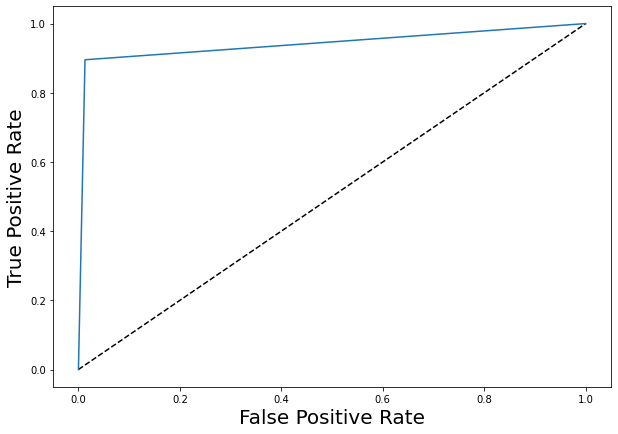

In [182]:
fpr, tpr, _ = roc_curve(y_test_one_hot, gs.predict(X_test_one_hot))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

Результаты точно такие же как и при label encoding

## GradientBoostingClassifier

In [183]:
pipe=Pipeline(steps=[('ss',StandardScaler()),('gradboosting',GradientBoostingClassifier())])
params={
    "gradboosting__criterion":['friedman_mse','mse'],
    "gradboosting__n_estimators":[100,150,200],
    "gradboosting__max_depth":[1,2,3,4],
}
gs=GridSearchCV(pipe,params,cv=5,n_jobs=-1)

In [184]:
gs=gs.fit(X_train_one_hot,y_train_one_hot)

In [79]:
gs.best_estimator_,gs.best_params_

(Pipeline(steps=[('ss', StandardScaler()),
                 ('gradboosting',
                  GradientBoostingClassifier(max_depth=4, n_estimators=200))]),
 {'gradboosting__criterion': 'friedman_mse',
  'gradboosting__max_depth': 4,
  'gradboosting__n_estimators': 200})

In [80]:
y_hat=gs.predict(X_test_one_hot)
print(classification_report(y_test_one_hot,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.94      0.87      0.91       325

    accuracy                           0.97      2026
   macro avg       0.96      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



ROC AUC = 0.9304


Text(0.5, 0, 'False Positive Rate')

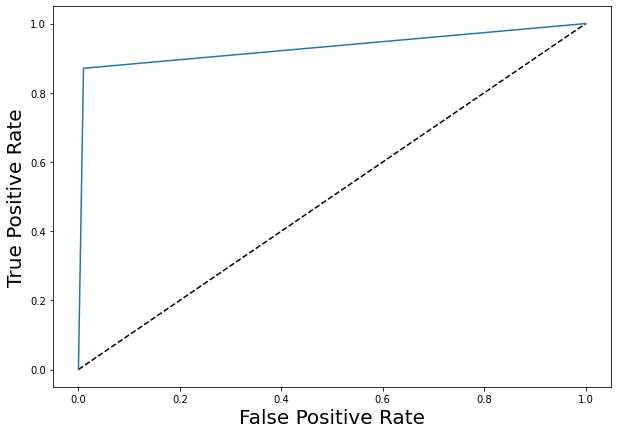

In [185]:
fpr, tpr, _ = roc_curve(y_test_one_hot, gs.predict(X_test_one_hot))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

Результаты точно такие же как и при label encoding

## CatBoostClassifier

In [ ]:
!pip install catboost

In [197]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=2000,)

cbc=cbc.fit(X_train_one_hot,y_train_one_hot)

In [199]:
y_hat=cbc.predict(X_test_one_hot)
print(classification_report(y_test_one_hot,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.94      0.88      0.91       325

    accuracy                           0.97      2026
   macro avg       0.96      0.94      0.95      2026
weighted avg       0.97      0.97      0.97      2026



ROC AUC = 0.9350


Text(0.5, 0, 'False Positive Rate')

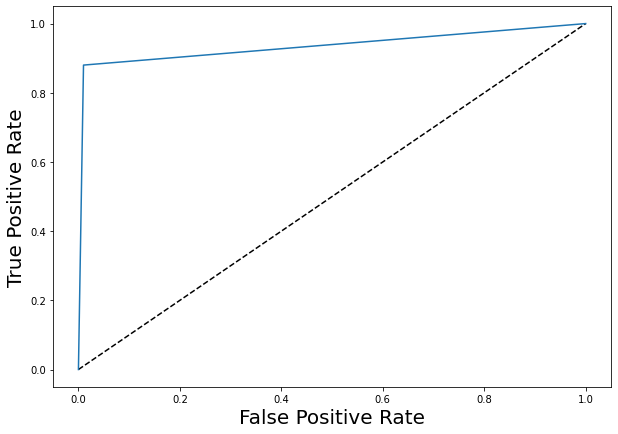

In [200]:
fpr, tpr, _ = roc_curve(y_test_one_hot, cbc.predict(X_test_one_hot))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

Результаты точно такие же как и при label encoding

## Градиентный бустинг(xgboost)

In [201]:
import xgboost as xgb

In [ ]:
param_dist = {'objective':'binary:logistic', 'n_estimators':400}
gbc = xgb.XGBClassifier(**param_dist)
gbc=gbc.fit(X_train_one_hot,y_train_one_hot,eval_set=[(X_test_one_hot,y_test_one_hot)],eval_metric='logloss')

In [203]:
y_hat=gbc.predict(X_test_one_hot)
print(classification_report(y_test_one_hot,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1701
           1       0.95      0.90      0.92       325

    accuracy                           0.98      2026
   macro avg       0.96      0.94      0.95      2026
weighted avg       0.98      0.98      0.98      2026



ROC AUC = 0.9430


Text(0.5, 0, 'False Positive Rate')

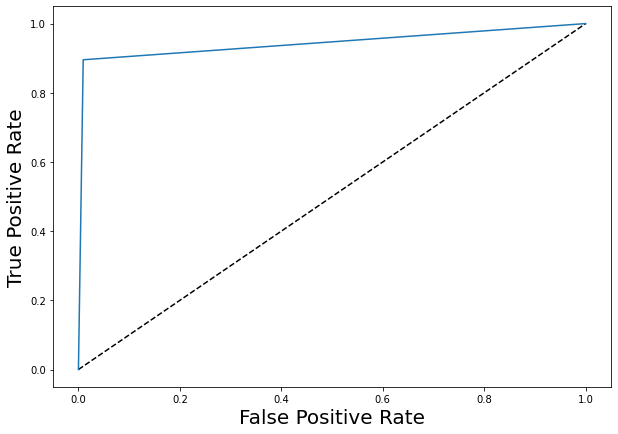

In [204]:
fpr, tpr, _ = roc_curve(y_test_one_hot, gbc.predict(X_test_one_hot))
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

Результаты точно такие же как и при label encoding

## Вывод по one-hot

Результаты получились точно такие как и при label-encodeing

# Вывод

1) Самые лучшие оценки у Adaboost и GradientBoosting.<br>
2) После применения аугментации положительная динамика наблюдалась только у TomelLinks(sampling_strategy=majority).<br>
3) После применения down-sampling оценки алгоритмов не изменились или стали чуть хуже.<br>
4) После применения one-hot оценки алгоритмов не изменились.